### Loading Data and Importing Modules


In [2]:
# Importing the required packages

import kaggle                   # To download the dataset from Kaggle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# To display the plots in the notebook (instead of being displayed in a separate window)
%matplotlib inline

In [ ]:
# Downloading the dataset from Kaggle and save it in the current directory

kaggle.api.authenticate()
kaggle.api.dataset_download_files('radheshyamkollipara/bank-customer-churn', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn


In [3]:
# Assigning a variable to the dataset

bank_df = pd.read_csv('Customer-Churn-Records.csv')

### Understand More About the Data

In [7]:
# Viewing the first five rows of the dataset

bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
# Viewing the last five rows of the dataset

bank_df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [10]:
# Getting the shape of the dataset with rows and columns

display(bank_df.shape)

(10000, 18)

In [12]:
# Getting all the columns

display('Features in the dataset: ', bank_df.columns)

'Features in the dataset: '

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

### About the Features (source: Kaggle)

- RowNumber: corresponds to the record (row) number and has no effect on the output.
- CustomerId: contains random values and has no effect on customer leaving the bank.
- Surname: the surname of a customer has no impact on their decision to leave the bank.
- CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography: a customer’s location can affect their decision to leave the bank.
- Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts: refers to the number of products that a customer has purchased through the bank.
- HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember: active customers are less likely to leave the bank.
- EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited: whether or not the customer left the bank.
- Complain: customer has complaint or not.
- Satisfaction Score: Score provided by the customer for their complaint resolution.
- Card Type: type of card hold by the customer.
- Points Earned: the points earned by the customer for using credit card.

In [9]:
# Getting the data types of all features (to ensure that the data types are correct) and checking for null values

bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
# Checking for duplicates

len(bank_df[bank_df.duplicated()])

0

In [10]:
# Finding redundant or categorical features

bank_df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

#### Data Statistical Summary

In [ ]:
# Getting the statistical summary of the dataset
# Dropping the columns that are not required for the analysis

df = bank_df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Card Type'], axis=1)
df.describe(include='all')

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000


### Identifying Outilers

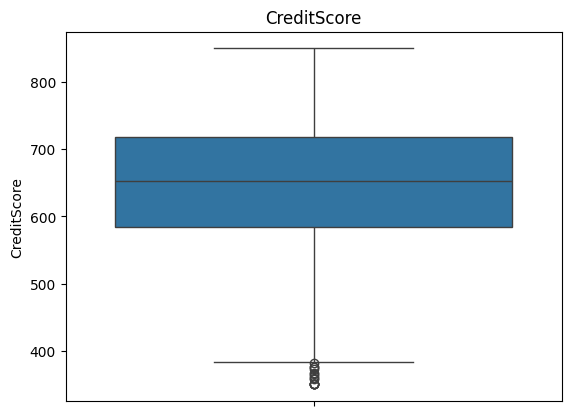

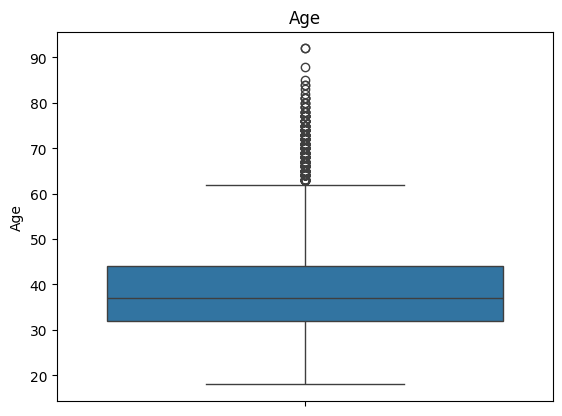

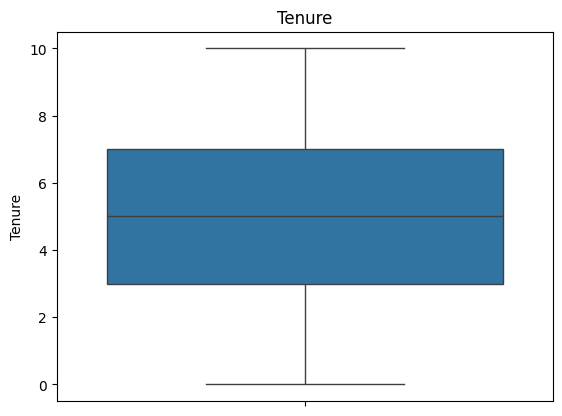

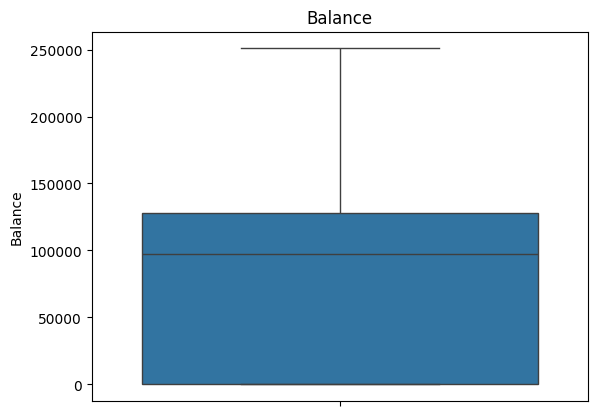

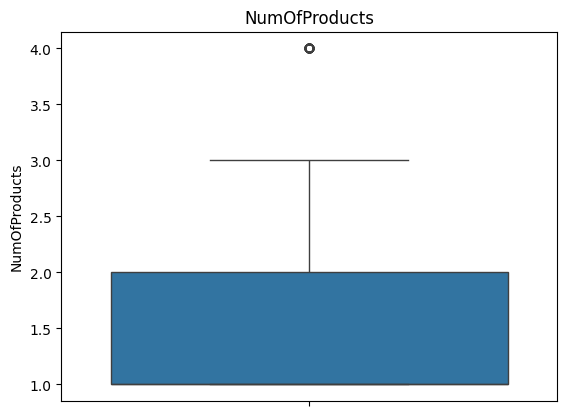

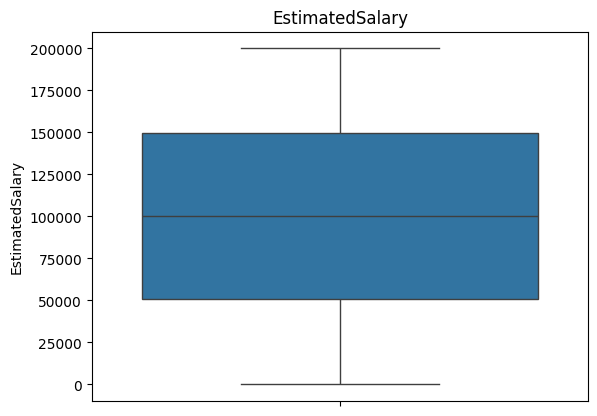

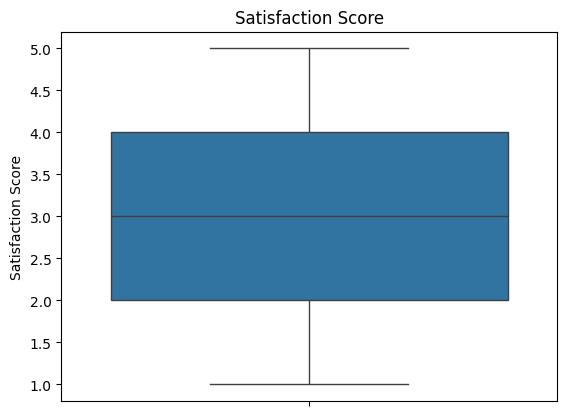

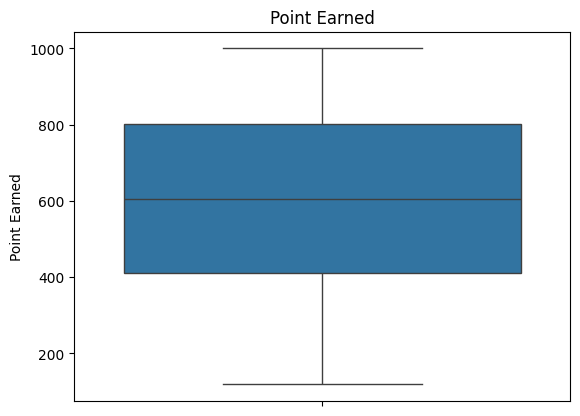

In [14]:
# Plotting the outliers from all the features

for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [48]:
# Getting more info about the 'NumOfProducts' feature
# Is the customer with 4 products an outlier?

display('Num of churn customers with 4 products: ', bank_df['Exited'].loc[bank_df['NumOfProducts'] == 4].value_counts())
display('Num of customers with 4 products: ', bank_df['NumOfProducts'].loc[bank_df['NumOfProducts'] == 4].value_counts())


'Num of churn customers with 4 products: '

Exited
1    60
Name: count, dtype: int64

'Num of customers with 4 products: '

NumOfProducts
4    60
Name: count, dtype: int64

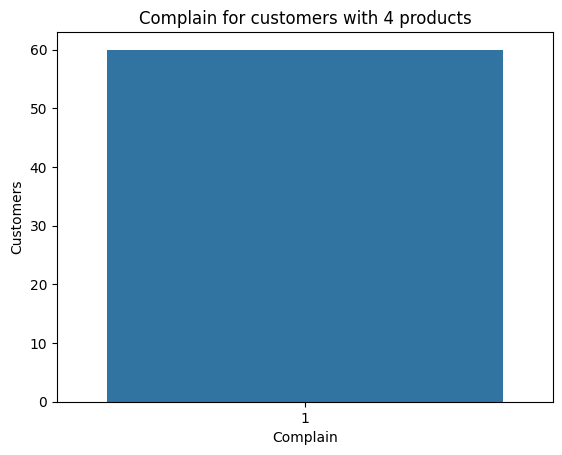

In [25]:
# Checking that customer with 4 products have complaints

df_4_products = bank_df.loc[bank_df['NumOfProducts'] == 4]
sns.countplot(x='Complain', data=df_4_products)
plt.title('Complain for customers with 4 products')
plt.xlabel('Complain')
plt.ylabel('Customers')
plt.show()

<Axes: >

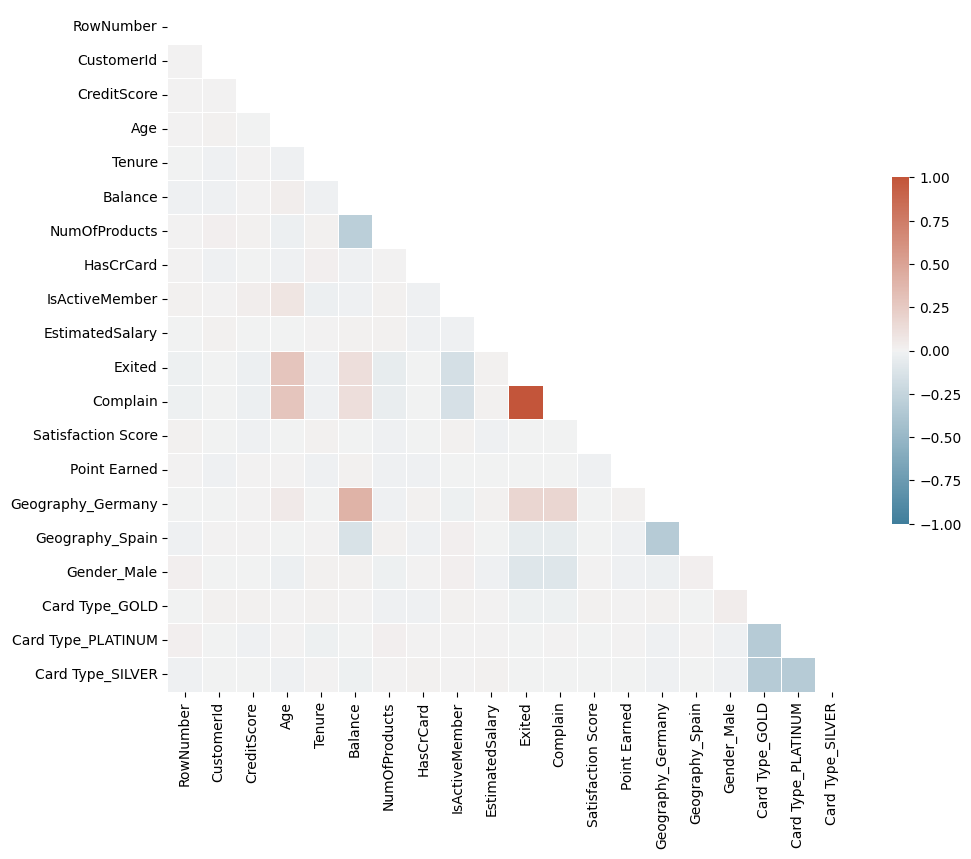

In [ ]:
# Getting the correlation matrix of the dataset

bank_df.drop(['Surname'], axis=1, inplace=True)

bank_df_encoded = pd.get_dummies(bank_df, drop_first=True)

corr = bank_df_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
# Getting the correlation matrix of the dataset

pd.set_option('display.expand_frame_repr', False)
print(corr)

                    RowNumber  CustomerId  CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  Complain  Satisfaction Score  Point Earned  Geography_Germany  Geography_Spain  Gender_Male  Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER
RowNumber            1.000000    0.004202     0.005840  0.000783 -0.006495 -0.009067       0.007246   0.000599        0.012044        -0.005988 -0.016140 -0.016957            0.009289      0.002360          -0.000044        -0.009905     0.018196       -0.003171            0.017031         -0.013555
CustomerId           0.004202    1.000000     0.005308  0.009497 -0.014883 -0.012419       0.016972  -0.014025        0.001665         0.015271 -0.006203 -0.007293           -0.000865     -0.013076          -0.003097         0.007800    -0.002641        0.012263           -0.003501         -0.006068
CreditScore          0.005840    0.005308     1.000000 -0.003965  0.000842  0.006268       0.0122

All of the customers with 4 products have churned. The feature 'NumOfProducts' has no strong correlation with any other feature. I could consider these customers to be outliers. However, in real life, the right thing to do would be to analyze this hypothesis and understand the business rules in order to apply an initiative to guide the salesperson on the quantity of products purchased by a customer.

If they were outliers, we could use the IQR method to eliminate them.

### Exploratory Data Analysis of the Data Set

In [11]:
# Columns

bank_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [12]:
# Printing the count of true and false values in the 'Exited' column

display(bank_df['Exited'].value_counts())

Exited
0    7962
1    2038
Name: count, dtype: int64

In [38]:
# Getting the percentage of churn and not churn customers

not_churn = bank_df['Exited'].value_counts()[0]
churn = bank_df['Exited'].value_counts()[1]
total_customers = bank_df['CustomerId'].count()

not_churn_perc = (not_churn / total_customers)
churn_perc = (churn / total_customers)

print('Not Churn Percentage: ', not_churn_perc * 100)
print('Churn Percentage: ', churn_perc * 100)


Not Churn Percentage:  79.62
Churn Percentage:  20.380000000000003


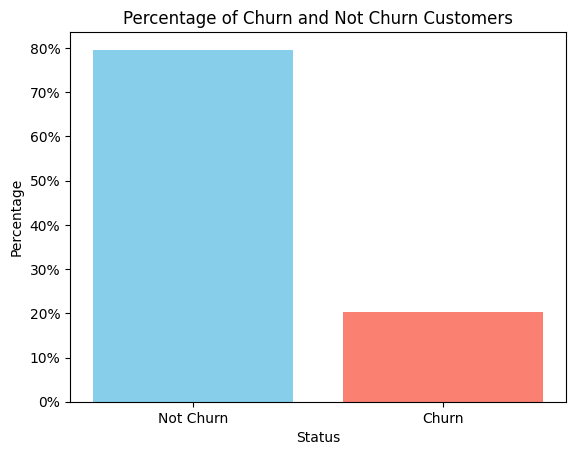

In [14]:
# Creating a bar plot to show the percentage of churn and not churn customers

labels = ['Not Churn', 'Churn']
sizes = [not_churn_perc, churn_perc]

plt.bar(labels, sizes, color=['skyblue', 'salmon'])
plt.title('Percentage of Churn and Not Churn Customers')
plt.xlabel('Status')
plt.ylabel('Percentage')

formatter = FuncFormatter(lambda x, pos: f'{x * 100:.0f}%')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

#### CreditScore Feature

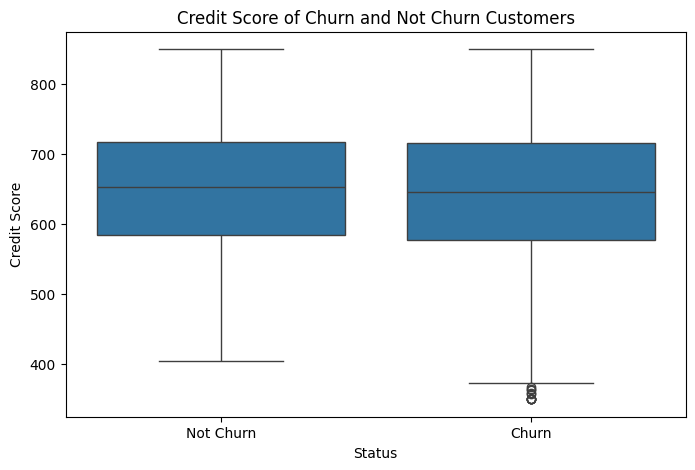

In [15]:
# Plotting the boxplot for the 'CreditScore' feature

plt.figure(figsize=(8,5))
sns.boxplot(x=bank_df['Exited'], y=bank_df['CreditScore'])
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.xlabel('Status')
plt.ylabel('Credit Score')
plt.title('Credit Score of Churn and Not Churn Customers')
plt.show()


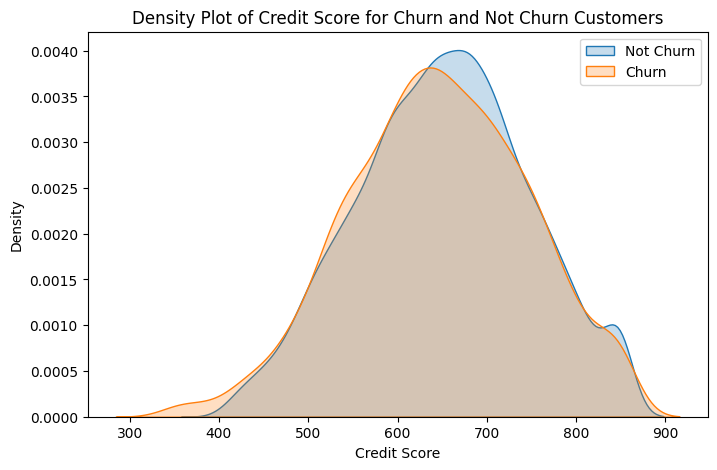

In [16]:
# Plotting the density plot for the 'CreditScore' feature

plt.figure(figsize=(8,5))
sns.kdeplot(bank_df[bank_df['Exited'] == 0]['CreditScore'], label='Not Churn', fill=True)
sns.kdeplot(bank_df[bank_df['Exited'] == 1]['CreditScore'], label='Churn', fill=True)
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.title('Density Plot of Credit Score for Churn and Not Churn Customers')
plt.legend()
plt.show()

The curves are very close, between 600 and 700 credit score. We can't say anything about this feature just yet.

#### Geography Feature

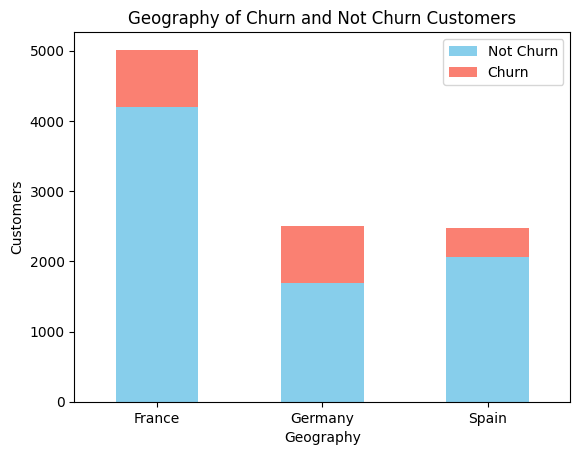

In [34]:
# Plotting the bar plot for the 'Geography' feature

churn_by_geo = bank_df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)

churn_by_geo.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Geography of Churn and Not Churn Customers')
plt.xlabel('Geography')
plt.ylabel('Customers')
plt.xticks(rotation=0)
plt.legend(['Not Churn', 'Churn'])

In [57]:
# Showing the percentage of churn customers by country

churn_by_country = bank_df.groupby('Geography')['Exited'].agg(
    churn_count='sum',
    total_count='count'
)

churn_by_country['churn_percentage'] = (churn_by_country['churn_count'] / churn_by_country['total_count']) * 100

display(churn_by_country['churn_count'])
display(churn_by_country['churn_percentage'])

Geography
France     811
Germany    814
Spain      413
Name: churn_count, dtype: int64

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: churn_percentage, dtype: float64

A third of Germany's customers churned.

#### Gender Feature

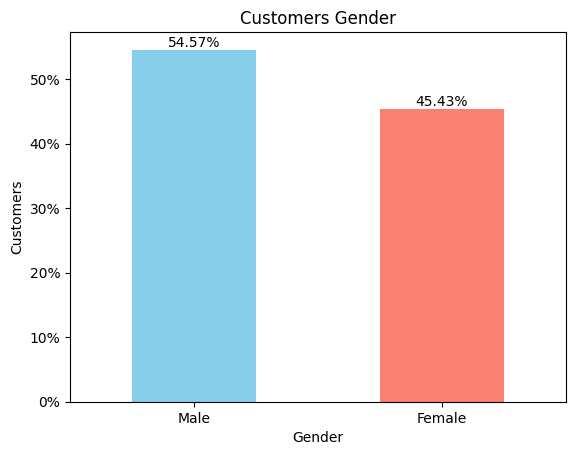

In [ ]:
# Plotting the gender's customers

gender = bank_df['Gender'].value_counts(normalize=True)

for i, v in enumerate(gender):
    plt.text(i, v, f'{v * 100:.2f}%', ha='center', va='bottom')

gender.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Customers Gender')
plt.xlabel('Gender')
plt.ylabel('Customers')
plt.xticks(rotation=0)

formatter = FuncFormatter(lambda x, pos: f'{x * 100:.0f}%')
plt.gca().yaxis.set_major_formatter(formatter)

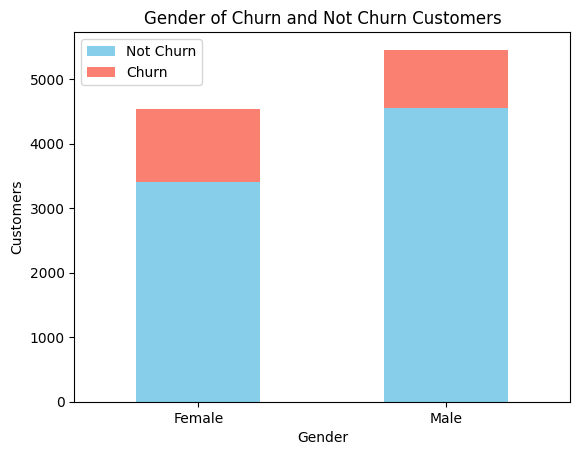

In [ ]:
# Plotting the bar plot for the 'Gender' feature

churn_by_gender = bank_df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)

churn_by_gender.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Gender of Churn and Not Churn Customers')
plt.xlabel('Gender')
plt.ylabel('Customers')
plt.xticks(rotation=0)
plt.legend(['Not Churn', 'Churn'])

In [58]:
# Showing the percentage of churn customers by gender

churn_by_gender = bank_df.groupby('Gender')['Exited'].agg(
    churn_count='sum',
    total_count='count'
)

churn_by_gender['churn_percentage'] = (churn_by_gender['churn_count'] / churn_by_gender['total_count']) * 100

display(churn_by_gender['churn_count'])
display(churn_by_gender['churn_percentage'])

Gender
Female    1139
Male       899
Name: churn_count, dtype: int64

Gender
Female    25.071539
Male      16.474253
Name: churn_percentage, dtype: float64

#### Age Feature

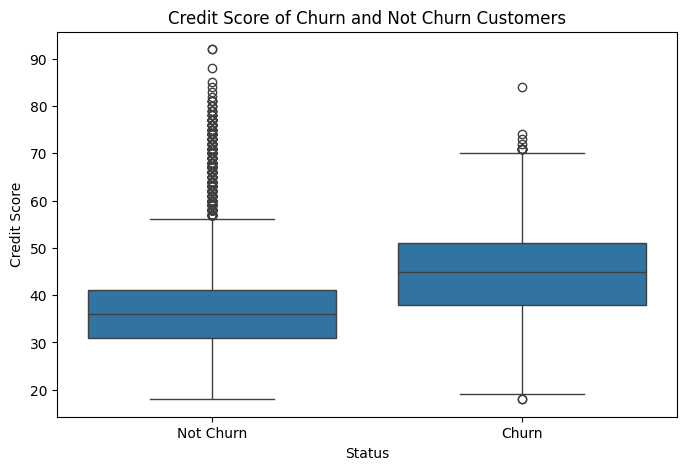

In [ ]:
# Plotting the boxplot for the 'Age' feature

plt.figure(figsize=(8,5))
sns.boxplot(x=bank_df['Exited'], y=bank_df['Age'])
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.xlabel('Status')
plt.ylabel('Age')
plt.title('Age of Churn and Not Churn Customers')
plt.show()

In [ ]:
# Showing the descriptive statistics of the 'Age' feature for churn and not churn customers

churn_group = bank_df[bank_df['Exited'] == 1]
not_churn_group = bank_df[bank_df['Exited'] == 0] 

display(churn_group['Age'].describe())
display(not_churn_group['Age'].describe())

count    2038.000000
mean       44.835623
std         9.759754
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

count    7962.000000
mean       37.408063
std        10.125957
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

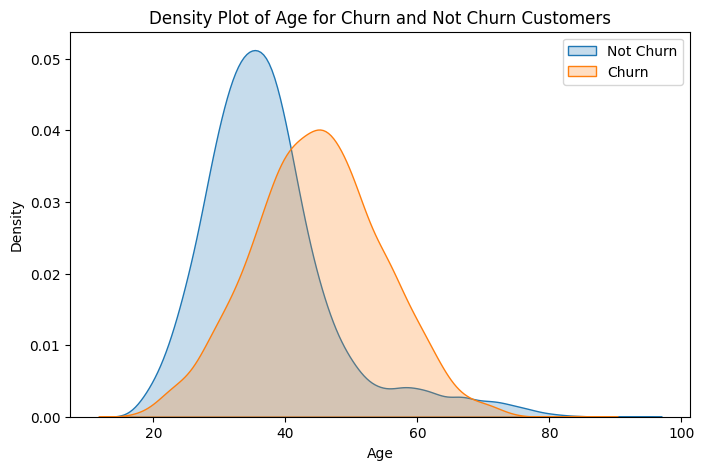

In [56]:
# Plotting the density plot for the 'Age' feature

plt.figure(figsize=(8,5))
sns.kdeplot(bank_df[bank_df['Exited'] == 0]['Age'], label='Not Churn', fill=True)
sns.kdeplot(bank_df[bank_df['Exited'] == 1]['Age'], label='Churn', fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age for Churn and Not Churn Customers')
plt.legend()
plt.show()

The 'Age' feature is a good candidate to influence churn.

#### Tenure Feature

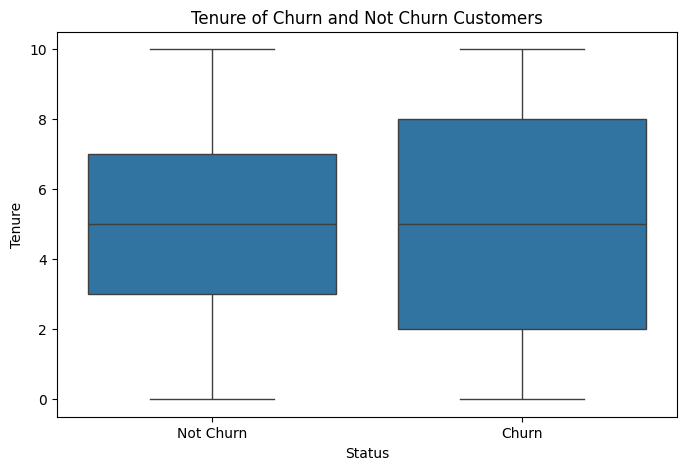

In [4]:
# Plotting the boxplot for the 'Tenure' feature

plt.figure(figsize=(8,5))
sns.boxplot(x=bank_df['Exited'], y=bank_df['Tenure'])
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.xlabel('Status')
plt.ylabel('Tenure')
plt.title('Tenure of Churn and Not Churn Customers')
plt.show()

In [ ]:
# Showing the descriptive statistics of the 'Tenure' feature for churn and not churn customers

churn_group = bank_df[bank_df['Exited'] == 1]
not_churn_group = bank_df[bank_df['Exited'] == 0] 

print('Churn customers: ', churn_group['Tenure'].describe())
print('\nNot churn customers: ', not_churn_group['Tenure'].describe())

Churn customers:  count    2038.000000
mean        4.934740
std         2.936768
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Tenure, dtype: float64

Not churn customers:  count    7962.000000
mean        5.032781
std         2.880496
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64


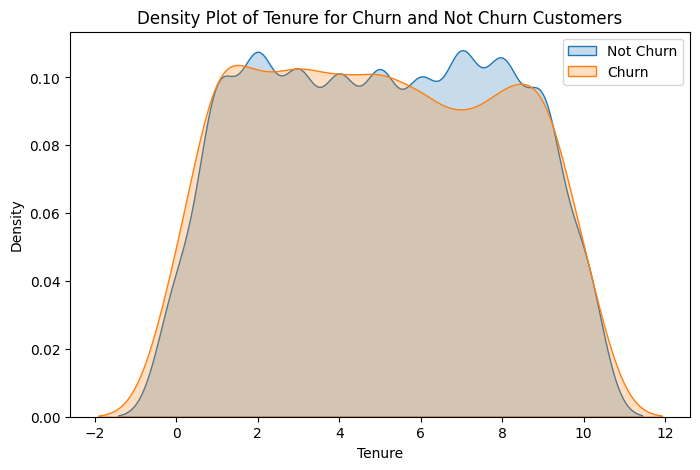

In [6]:
# Plotting the density plot for the 'Tenure' feature

plt.figure(figsize=(8,5))
sns.kdeplot(bank_df[bank_df['Exited'] == 0]['Tenure'], label='Not Churn', fill=True)
sns.kdeplot(bank_df[bank_df['Exited'] == 1]['Tenure'], label='Churn', fill=True)
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('Density Plot of Tenure for Churn and Not Churn Customers')
plt.legend()
plt.show()

We can't say anything about this feature just yet.

#### Balance Feature

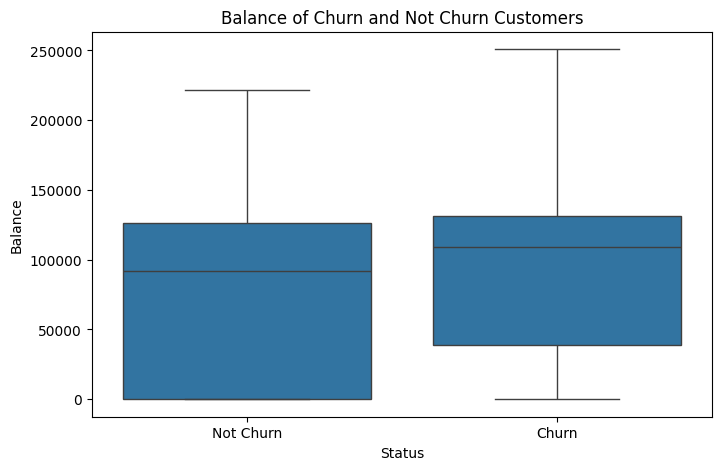

In [7]:
# Plotting the boxplot for the 'Balance' feature

plt.figure(figsize=(8,5))
sns.boxplot(x=bank_df['Exited'], y=bank_df['Balance'])
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.xlabel('Status')
plt.ylabel('Balance')
plt.title('Balance of Churn and Not Churn Customers')
plt.show()

In [8]:
# Showing the descriptive statistics of the 'Balance' feature for churn and not churn customers

churn_group = bank_df[bank_df['Exited'] == 1]
not_churn_group = bank_df[bank_df['Exited'] == 0] 

display(churn_group['Balance'].describe())
display(not_churn_group['Balance'].describe())

count      2038.000000
mean      91109.476006
std       58346.483197
min           0.000000
25%       38591.222500
50%      109344.230000
75%      131423.637500
max      250898.090000
Name: Balance, dtype: float64

count      7962.000000
mean      72742.750663
std       62851.577108
min           0.000000
25%           0.000000
50%       92063.060000
75%      126419.330000
max      221532.800000
Name: Balance, dtype: float64

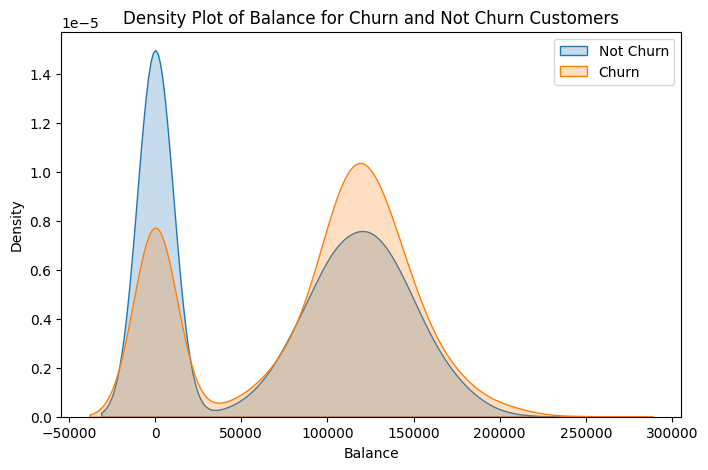

In [9]:
# Plotting the density plot for the 'Balance' feature

plt.figure(figsize=(8,5))
sns.kdeplot(bank_df[bank_df['Exited'] == 0]['Balance'], label='Not Churn', fill=True)
sns.kdeplot(bank_df[bank_df['Exited'] == 1]['Balance'], label='Churn', fill=True)
plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Density Plot of Balance for Churn and Not Churn Customers')
plt.legend()
plt.show()

#### NumOfProducts Feature

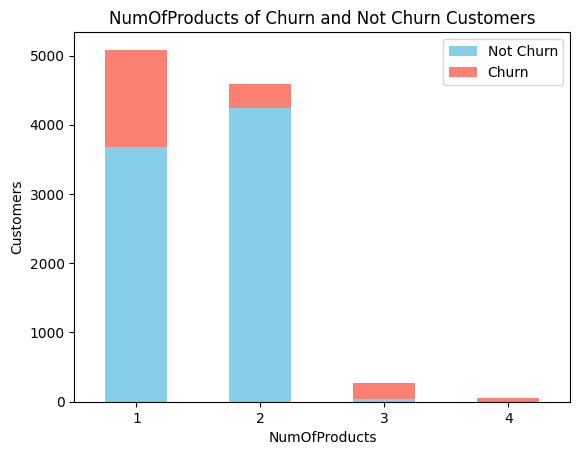

In [ ]:
# Plotting the bar plot for the 'NumOfProducts' feature

churn_by_NumOfProducts = bank_df.groupby(['NumOfProducts', 'Exited']).size().unstack(fill_value=0)

churn_by_NumOfProducts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('NumOfProducts of Churn and Not Churn Customers')
plt.xlabel('NumOfProducts')
plt.ylabel('Customers')
plt.xticks(rotation=0)
plt.legend(['Not Churn', 'Churn'])

In [11]:
# Showing the percentage of churn customers by NumOfProducts

churn_by_NumOfProducts = bank_df.groupby('NumOfProducts')['Exited'].agg(
    churn_count='sum',
    total_count='count'
)

churn_by_NumOfProducts['churn_percentage'] = (churn_by_NumOfProducts['churn_count'] / churn_by_NumOfProducts['total_count']) * 100

display(churn_by_NumOfProducts['churn_count'])
display(churn_by_NumOfProducts['churn_percentage'])

NumOfProducts
1    1409
2     349
3     220
4      60
Name: churn_count, dtype: int64

NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: churn_percentage, dtype: float64

#### HasCrCard Feature

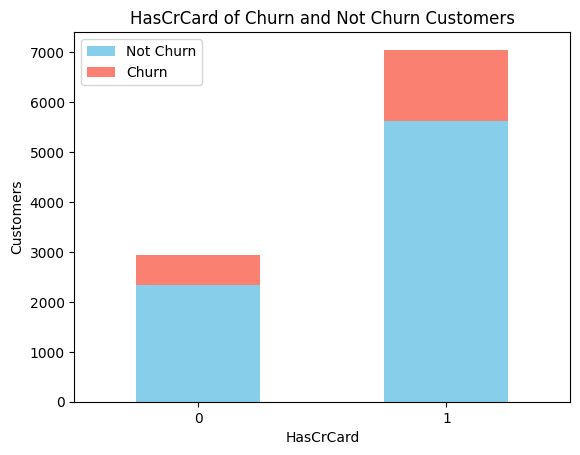

In [25]:
# Plotting the bar plot for the 'HasCrCard' feature

churn_by_HasCrCard = bank_df.groupby(['HasCrCard', 'Exited']).size().unstack(fill_value=0)

churn_by_HasCrCard.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('HasCrCard of Churn and Not Churn Customers')
plt.xlabel('HasCrCard')
plt.ylabel('Customers')
plt.xticks(rotation=0)
plt.legend(['Not Churn', 'Churn'])

In [26]:
# Showing the percentage of churn customers by HasCrCard

churn_by_HasCrCard = bank_df.groupby('HasCrCard')['Exited'].agg(
    churn_count='sum',
    total_count='count'
)

churn_by_HasCrCard['churn_percentage'] = (churn_by_HasCrCard['churn_count'] / churn_by_HasCrCard['total_count']) * 100

display(churn_by_HasCrCard['churn_count'])
display(churn_by_HasCrCard['churn_percentage'])

HasCrCard
0     613
1    1425
Name: churn_count, dtype: int64

HasCrCard
0    20.814941
1    20.198441
Name: churn_percentage, dtype: float64

#### IsActiveMember Feature

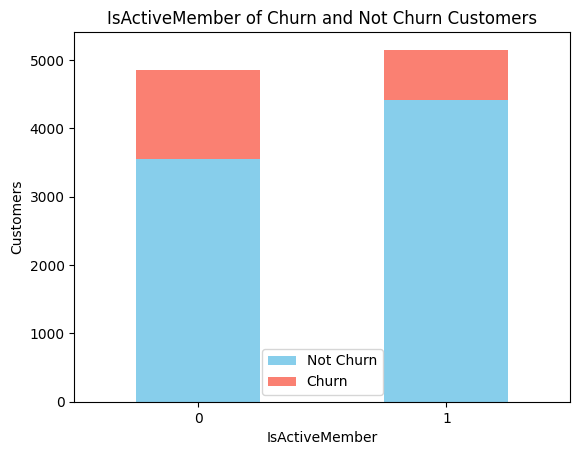

In [ ]:
# Plotting the bar plot for the 'IsActiveMember' feature

churn_by_IsActiveMember = bank_df.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)

churn_by_IsActiveMember.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('IsActiveMember of Churn and Not Churn Customers')
plt.xlabel('IsActiveMember')
plt.ylabel('Customers')
plt.xticks(rotation=0)
plt.legend(['Not Churn', 'Churn'])

If the customer is still active, it means that the customer has given up on a product and not on the bank.

In [17]:
# Showing the percentage of churn customers by IsActiveMember

churn_by_IsActiveMember = bank_df.groupby('IsActiveMember')['Exited'].agg(
    churn_count='sum',
    total_count='count'
)

churn_by_IsActiveMember['churn_percentage'] = (churn_by_IsActiveMember['churn_count'] / churn_by_IsActiveMember['total_count']) * 100

display(churn_by_IsActiveMember['churn_count'])
display(churn_by_IsActiveMember['churn_percentage'])

IsActiveMember
0    1303
1     735
Name: churn_count, dtype: int64

IsActiveMember
0    26.871520
1    14.269074
Name: churn_percentage, dtype: float64

#### EstimatedSalary Feature

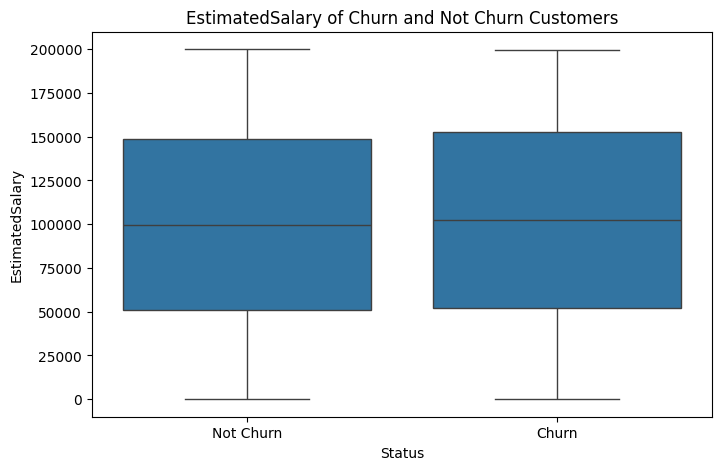

In [19]:
# Plotting the boxplot for the 'EstimatedSalary' feature

plt.figure(figsize=(8,5))
sns.boxplot(x=bank_df['Exited'], y=bank_df['EstimatedSalary'])
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.xlabel('Status')
plt.ylabel('EstimatedSalary')
plt.title('EstimatedSalary of Churn and Not Churn Customers')
plt.show()

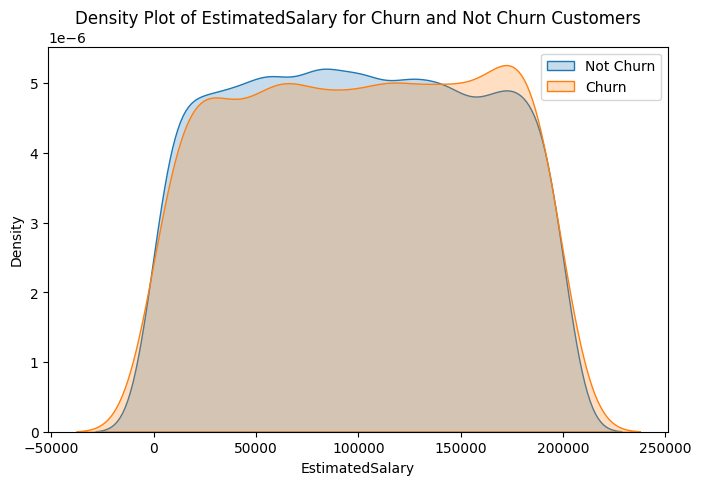

In [21]:
# Plotting the density plot for the 'EstimatedSalary' feature

plt.figure(figsize=(8,5))
sns.kdeplot(bank_df[bank_df['Exited'] == 0]['EstimatedSalary'], label='Not Churn', fill=True)
sns.kdeplot(bank_df[bank_df['Exited'] == 1]['EstimatedSalary'], label='Churn', fill=True)
plt.xlabel('EstimatedSalary')
plt.ylabel('Density')
plt.title('Density Plot of EstimatedSalary for Churn and Not Churn Customers')
plt.legend()
plt.show()

#### Complain Feature

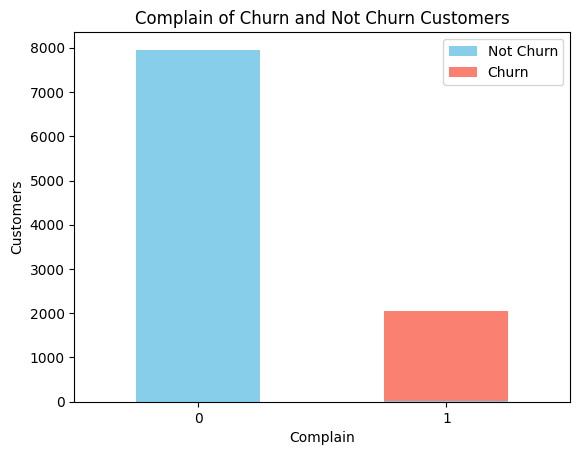

In [ ]:
# Plotting the bar plot for the 'Complain' feature

churn_by_Complain = bank_df.groupby(['Complain', 'Exited']).size().unstack(fill_value=0)

churn_by_Complain.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Complain of Churn and Not Churn Customers')
plt.xlabel('Complain')
plt.ylabel('Customers')
plt.xticks(rotation=0)
plt.legend(['Not Churn', 'Churn'])

In [24]:
# Showing the percentage of churn customers by Complain

churn_by_Complain = bank_df.groupby('Complain')['Exited'].agg(
    churn_count='sum',
    total_count='count'
)

churn_by_Complain['churn_percentage'] = (churn_by_Complain['churn_count'] / churn_by_Complain['total_count']) * 100

display(churn_by_Complain['churn_count'])
display(churn_by_Complain['churn_percentage'])

Complain
0       4
1    2034
Name: churn_count, dtype: int64

Complain
0     0.050277
1    99.510763
Name: churn_percentage, dtype: float64

It's clear that if there's a complaint, there's a cancellation.

#### Satisfaction Score Feature

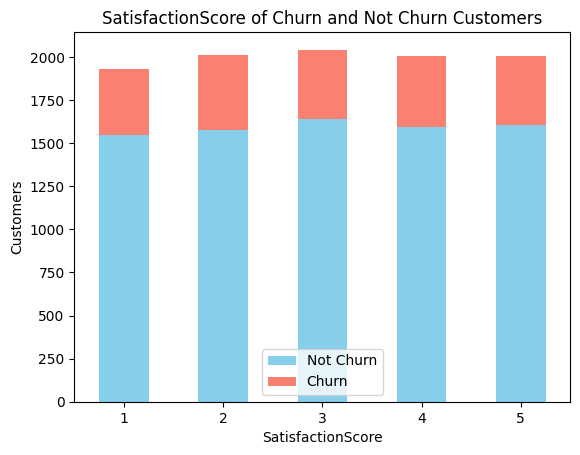

In [30]:
# Plotting the bar plot for the 'SatisfactionScore' feature

bank_df.rename(columns={'Card Type': 'CardType', 'Satisfaction Score': 'SatisfactionScore', 'Point Earned': 'PointEarned'}, inplace=True)

churn_by_SatisfactionScore = bank_df.groupby(['SatisfactionScore', 'Exited']).size().unstack(fill_value=0)

churn_by_SatisfactionScore.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('SatisfactionScore of Churn and Not Churn Customers')
plt.xlabel('SatisfactionScore')
plt.ylabel('Customers')
plt.xticks(rotation=0)
plt.legend(['Not Churn', 'Churn'])

In [29]:
# Showing the percentage of churn customers by SatisfactionScore

churn_by_SatisfactionScore = bank_df.groupby('SatisfactionScore')['Exited'].agg(
    churn_count='sum',
    total_count='count'
)

churn_by_SatisfactionScore['churn_percentage'] = (churn_by_SatisfactionScore['churn_count'] / churn_by_SatisfactionScore['total_count']) * 100

display(churn_by_SatisfactionScore['churn_count'])
display(churn_by_SatisfactionScore['churn_percentage'])

SatisfactionScore
1    387
2    439
3    401
4    414
5    397
Name: churn_count, dtype: int64

SatisfactionScore
1    20.031056
2    21.797418
3    19.637610
4    20.617530
5    19.810379
Name: churn_percentage, dtype: float64

#### CardType Feature

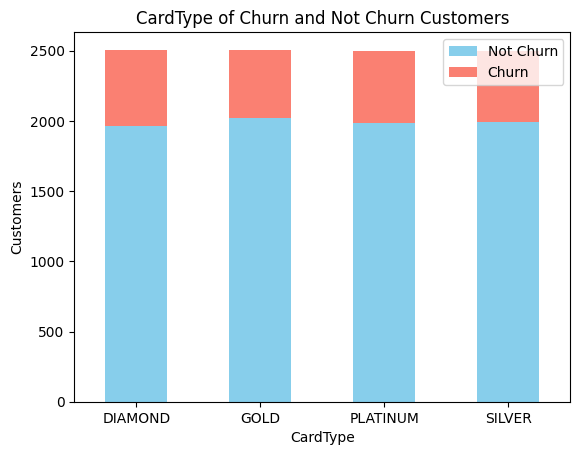

In [31]:
# Plotting the bar plot for the 'CardType' feature

churn_by_CardType = bank_df.groupby(['CardType', 'Exited']).size().unstack(fill_value=0)

churn_by_CardType.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('CardType of Churn and Not Churn Customers')
plt.xlabel('CardType')
plt.ylabel('Customers')
plt.xticks(rotation=0)
plt.legend(['Not Churn', 'Churn'])

In [32]:
# Showing the percentage of churn customers by CardType

churn_by_CardType = bank_df.groupby('CardType')['Exited'].agg(
    churn_count='sum',
    total_count='count'
)

churn_by_CardType['churn_percentage'] = (churn_by_CardType['churn_count'] / churn_by_CardType['total_count']) * 100

display(churn_by_CardType['churn_count'])
display(churn_by_CardType['churn_percentage'])

CardType
DIAMOND     546
GOLD        482
PLATINUM    508
SILVER      502
Name: churn_count, dtype: int64

CardType
DIAMOND     21.779019
GOLD        19.264588
PLATINUM    20.360721
SILVER      20.112179
Name: churn_percentage, dtype: float64

#### PointEarned Feature

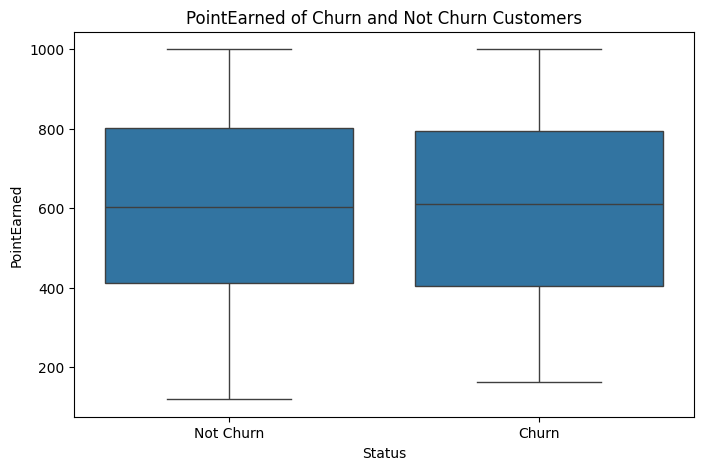

In [34]:
# Plotting the boxplot for the 'PointEarned' feature

plt.figure(figsize=(8,5))
sns.boxplot(x=bank_df['Exited'], y=bank_df['PointEarned'])
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.xlabel('Status')
plt.ylabel('PointEarned')
plt.title('PointEarned of Churn and Not Churn Customers')
plt.show()

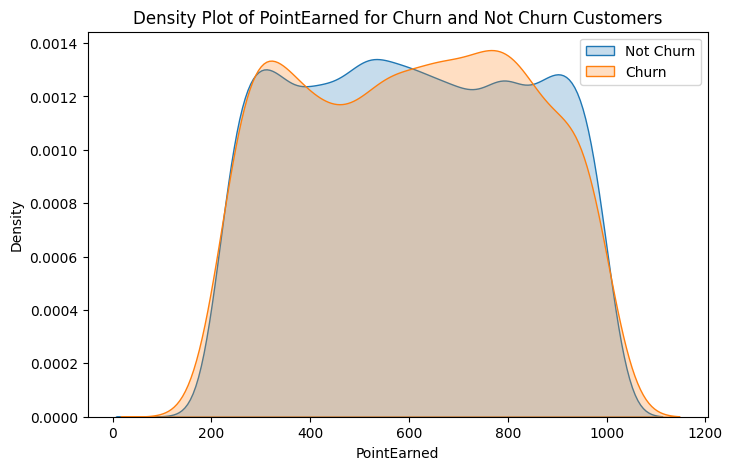

In [35]:
# Plotting the density plot for the 'PointEarned' feature

plt.figure(figsize=(8,5))
sns.kdeplot(bank_df[bank_df['Exited'] == 0]['PointEarned'], label='Not Churn', fill=True)
sns.kdeplot(bank_df[bank_df['Exited'] == 1]['PointEarned'], label='Churn', fill=True)
plt.xlabel('PointEarned')
plt.ylabel('Density')
plt.title('Density Plot of PointEarned for Churn and Not Churn Customers')
plt.legend()
plt.show()